In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("laptops.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                1022 non-null   object 
 1   Price                1022 non-null   float64
 2   Color                1022 non-null   object 
 3   Condition            1022 non-null   object 
 4   GPU                  1022 non-null   object 
 5   Processor Speed      1022 non-null   float64
 6   OS                   1022 non-null   object 
 7   Storage Type         1022 non-null   object 
 8   Hard Drive Capacity  1022 non-null   int64  
 9   SSD Capacity         1022 non-null   int64  
 10  Screen Size (inch)   1022 non-null   float64
 11  Ram Size             1022 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 95.9+ KB


In [4]:
from sklearn.model_selection import train_test_split
X = data.drop(['Price'], axis=1)
y = data['Price']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [6]:
train_data = X_train.join(y_train)

In [7]:
train_data

,Brand,Color,Condition,GPU,Processor Speed,OS,Storage Type,Hard Drive Capacity,SSD Capacity,Screen Size (inch),Ram Size,Price
332,lenovo,other,Used,intel,2.6,windows,ssd,0,256,14.0,8,164.2
298,dell,gray,Used,other,2.6,windows,hdd,250,0,14.0,4,40.0
289,dell,other,Used,other,1.9,windows,hdd/ssd,512,512,11.6,16,599.0
30,dell,black,Used,other,2.6,windows,hdd/ssd,256,256,14.0,8,105.0
689,hp,other,Used,intel,1.9,windows,hdd/ssd,1000,128,13.0,16,415.0
...,...,...,...,...,...,...,...,...,...,...,...,...
946,lenovo,black,Used,other,2.4,unknown,ssd,0,256,12.5,8,95.0
749,hp,silver,Used,amd,2.0,windows,ssd,0,512,15.6,16,325.0
225,lenovo,black,Very Good - Refurbished,nvidia,2.7,windows,ssd,0,1000,15.6,16,339.0
226,acer,black,New,nvidia,2.7,windows,hdd/ssd,512,512,15.6,16,629.0


array([[<Axes: title={'center': 'Processor Speed'}>,
        <Axes: title={'center': 'Hard Drive Capacity'}>],
       [<Axes: title={'center': 'SSD Capacity'}>,
        <Axes: title={'center': 'Screen Size (inch)'}>],
       [<Axes: title={'center': 'Ram Size'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

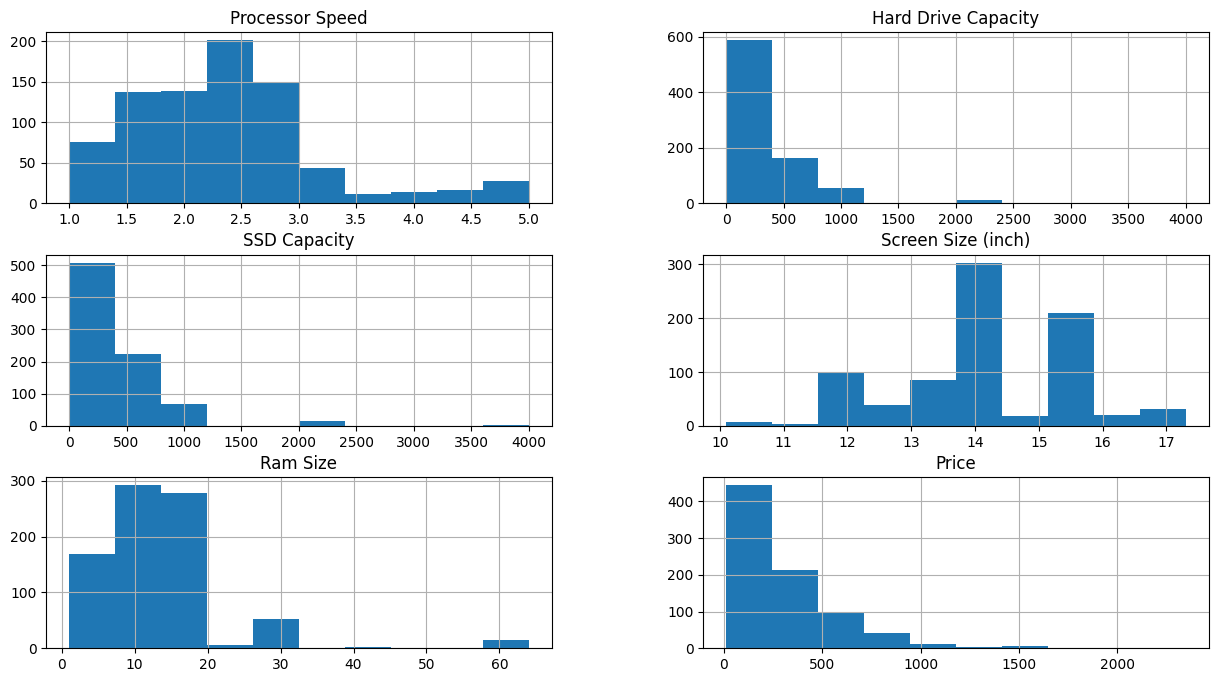

In [8]:
train_data.hist(figsize=(15,8))

<ipython-input-9-9b30640f8fb9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")


<Axes: >

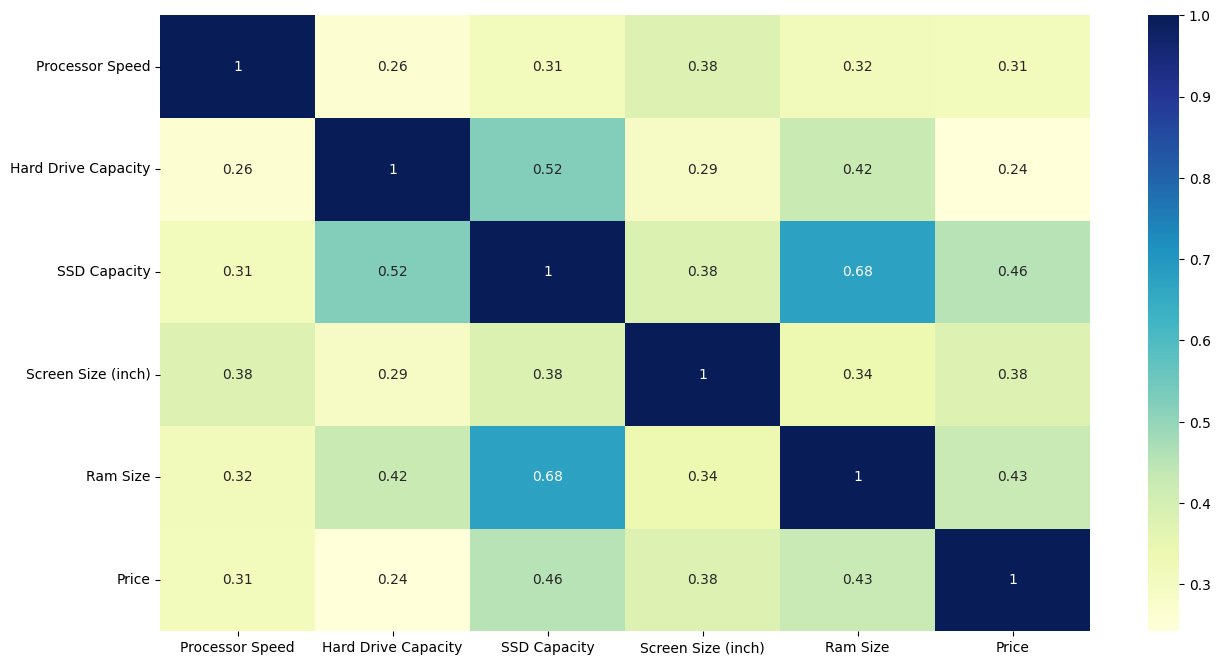

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

In [10]:
train_data

,Brand,Color,Condition,GPU,Processor Speed,OS,Storage Type,Hard Drive Capacity,SSD Capacity,Screen Size (inch),Ram Size,Price
332,lenovo,other,Used,intel,2.6,windows,ssd,0,256,14.0,8,164.2
298,dell,gray,Used,other,2.6,windows,hdd,250,0,14.0,4,40.0
289,dell,other,Used,other,1.9,windows,hdd/ssd,512,512,11.6,16,599.0
30,dell,black,Used,other,2.6,windows,hdd/ssd,256,256,14.0,8,105.0
689,hp,other,Used,intel,1.9,windows,hdd/ssd,1000,128,13.0,16,415.0
...,...,...,...,...,...,...,...,...,...,...,...,...
946,lenovo,black,Used,other,2.4,unknown,ssd,0,256,12.5,8,95.0
749,hp,silver,Used,amd,2.0,windows,ssd,0,512,15.6,16,325.0
225,lenovo,black,Very Good - Refurbished,nvidia,2.7,windows,ssd,0,1000,15.6,16,339.0
226,acer,black,New,nvidia,2.7,windows,hdd/ssd,512,512,15.6,16,629.0


In [11]:
from sklearn.preprocessing import LabelEncoder

# Selecciona las columnas que deseas transformar
columnas_a_transformar = ['Brand', 'Color', 'Condition', 'GPU', 'OS', 'Storage Type']

# Inicializa el LabelEncoder
label_encoder = LabelEncoder()

# Aplica LabelEncoder solo a las columnas seleccionadas usando applymap()
train_data[columnas_a_transformar] = train_data[columnas_a_transformar].apply(label_encoder.fit_transform)

In [12]:
train_data[columnas_a_transformar]


,Brand,Color,Condition,GPU,OS,Storage Type
332,4,10,6,1,3,2
298,2,5,6,4,3,0
289,2,10,6,4,3,1
30,2,1,6,4,3,1
689,3,10,6,1,3,1
...,...,...,...,...,...,...
946,4,1,6,4,2,2
749,3,15,6,0,3,2
225,4,1,7,3,3,2
226,0,1,4,3,3,1


<Axes: >

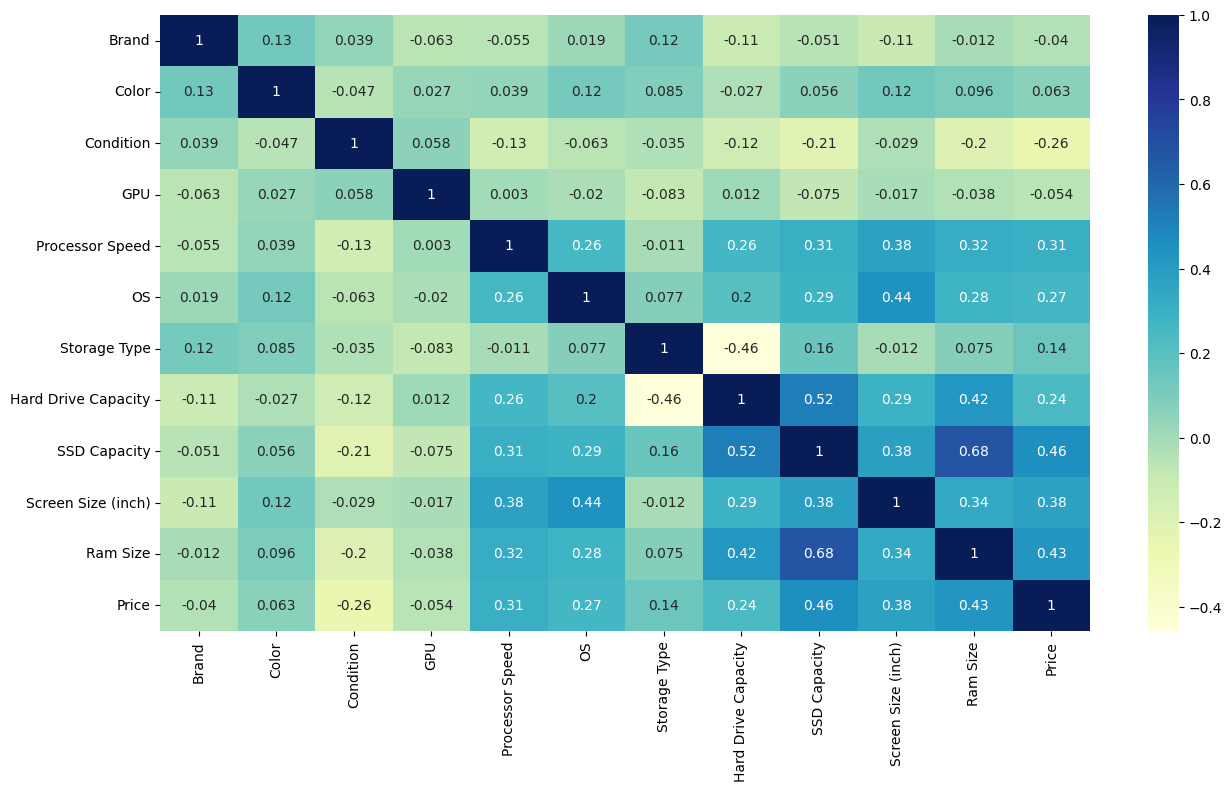

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

In [14]:
train_data.fillna(value=0)

,Brand,Color,Condition,GPU,Processor Speed,OS,Storage Type,Hard Drive Capacity,SSD Capacity,Screen Size (inch),Ram Size,Price
332,4,10,6,1,2.6,3,2,0,256,14.0,8,164.2
298,2,5,6,4,2.6,3,0,250,0,14.0,4,40.0
289,2,10,6,4,1.9,3,1,512,512,11.6,16,599.0
30,2,1,6,4,2.6,3,1,256,256,14.0,8,105.0
689,3,10,6,1,1.9,3,1,1000,128,13.0,16,415.0
...,...,...,...,...,...,...,...,...,...,...,...,...
946,4,1,6,4,2.4,2,2,0,256,12.5,8,95.0
749,3,15,6,0,2.0,3,2,0,512,15.6,16,325.0
225,4,1,7,3,2.7,3,2,0,1000,15.6,16,339.0
226,0,1,4,3,2.7,3,1,512,512,15.6,16,629.0


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['Price'], axis=1), train_data['Price']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)


LinearRegression()

In [16]:
test_data = X_test.join(y_test)

In [17]:
from sklearn.preprocessing import LabelEncoder

# Selecciona las columnas que deseas transformar
columnas_a_transformar = ['Brand', 'Color', 'Condition', 'GPU', 'OS', 'Storage Type']

# Inicializa el LabelEncoder
label_encoder = LabelEncoder()

# Aplica LabelEncoder solo a las columnas seleccionadas usando applymap()
test_data[columnas_a_transformar] = test_data[columnas_a_transformar].apply(label_encoder.fit_transform)


In [18]:
X_test, y_test = test_data.drop(['Price'], axis=1), test_data['Price']

In [23]:
X_test_s = scaler.transform(X_test)

In [24]:
reg.score(X_test_s,y_test)

0.42481154803174126

In [27]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train_s,y_train)

RandomForestRegressor()

In [28]:
forest.score(X_test_s, y_test)

0.4665227213912557

In [47]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [200, 250, 280],
    "max_features": [8],
    "min_samples_split": [14,16,18,20],
    "max_depth":[None,4,8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'max_features': [8],
                         'min_samples_split': [14, 16, 18, 20],
                         'n_estimators': [200, 250, 280]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [48]:
print(grid_search.best_estimator_)

RandomForestRegressor(max_features=8, min_samples_split=14, n_estimators=280)


In [49]:
best_forest = grid_search.best_estimator_

In [50]:
best_forest.score(X_test_s,y_test)

0.5294730671461485